<a href="https://colab.research.google.com/github/Nwosu-Ihueze/bag_classifier/blob/main/model_1_overfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img_dir = ('/content/drive/MyDrive/image_classifier/dataset')

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [5]:
bag_train = tf.keras.preprocessing.image_dataset_from_directory(
  img_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size = (180, 180),
  batch_size=32)

Found 2000 files belonging to 5 classes.
Using 1600 files for training.


In [6]:
bag_val = tf.keras.preprocessing.image_dataset_from_directory(
  img_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(180,180),
  batch_size=32)

Found 2000 files belonging to 5 classes.
Using 400 files for validation.


In [7]:
class_names = bag_train.class_names
print(class_names)

['Backpack', 'Briefcase', 'Duffle', 'Handbag', 'Purse']


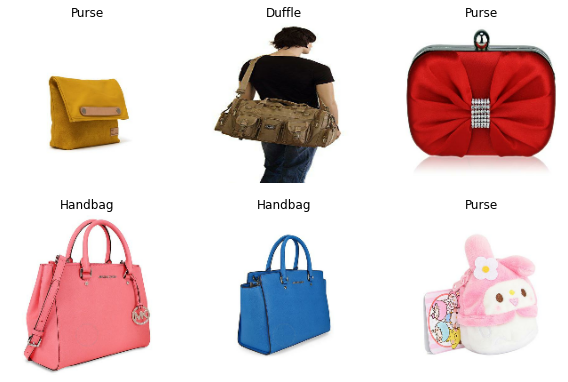

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in bag_train.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
bag_class = 5

bag_model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(bag_class)
])

In [11]:
bag_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
bag_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)        0

In [14]:
epochs=15
history = bag_model.fit(
  bag_train,
  validation_data = bag_val,
  epochs = epochs
)

Epoch 1/15
50/50 [==============================] - 1191s 24s/step - loss: 1.6492 - accuracy: 0.2940 - val_loss: 1.2595 - val_accuracy: 0.5350
Epoch 2/15
50/50 [==============================] - 56s 1s/step - loss: 1.1563 - accuracy: 0.5661 - val_loss: 1.2303 - val_accuracy: 0.5250
Epoch 3/15
50/50 [==============================] - 55s 1s/step - loss: 0.9683 - accuracy: 0.6509 - val_loss: 1.1423 - val_accuracy: 0.5725
Epoch 4/15
50/50 [==============================] - 56s 1s/step - loss: 0.7769 - accuracy: 0.7106 - val_loss: 1.3190 - val_accuracy: 0.5575
Epoch 5/15
50/50 [==============================] - 56s 1s/step - loss: 0.5707 - accuracy: 0.7899 - val_loss: 1.3140 - val_accuracy: 0.5700
Epoch 6/15
50/50 [==============================] - 56s 1s/step - loss: 0.4474 - accuracy: 0.8376 - val_loss: 1.7401 - val_accuracy: 0.5700
Epoch 7/15
50/50 [==============================] - 56s 1s/step - loss: 0.2816 - accuracy: 0.9130 - val_loss: 1.9322 - val_accuracy: 0.5475
Epoch 8/15
50/50 

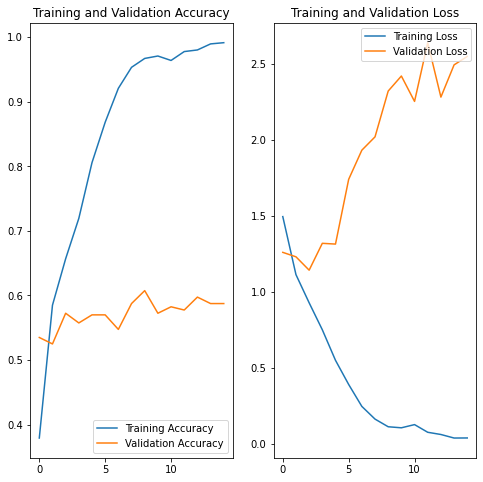

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()